### Background and Overview:
The [MIMIC-III](https://mimic.mit.edu/about/mimic/) (Medical Information Mart for Intensive Care) Clinical Database is comprised of deidentified health-related data associated with over 46,000 patients (available through request). Its 26 tables have a vast amount of information on the patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012 ranging from patient demographics to lab reports to detailed clinical notes. 

### Project Proposal: Using Unstructured Data Fields (Text) to Improve Mortality Prediction
The goal of this project is to assess whether using information from text fields, which often require further data processing, can improve mortality prediction. 

#### Prior Work
Previous analysis was performed on 1,000 patients, with a 50/50 split between patients who were marked alive and those who were marked deceased. It explored the different reasons patients are admitted to the hospital. 

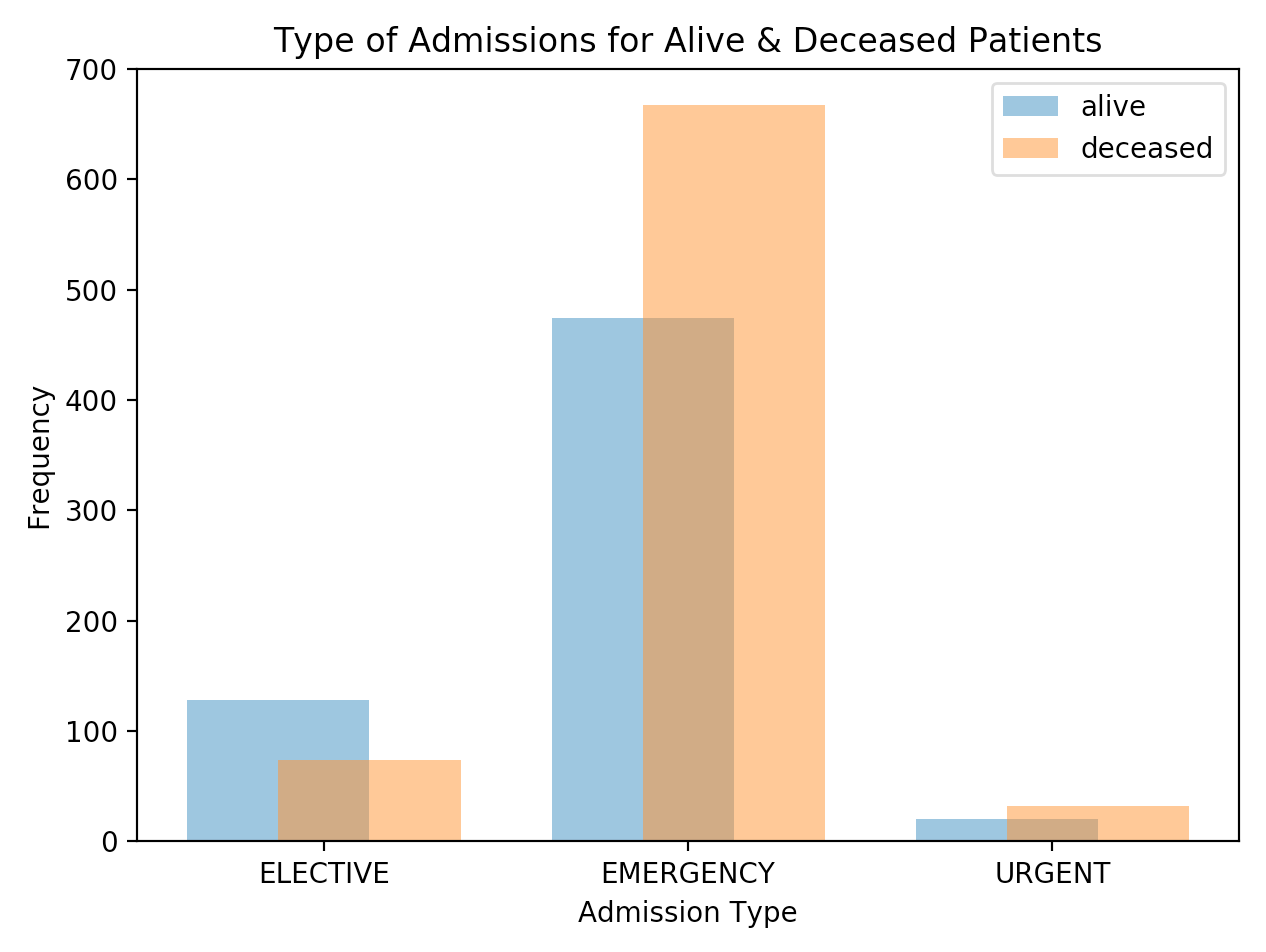

In [1]:
from IPython.display import Image

Image(filename='Figure_2_from_semi_round.png', width=450)

### Updated Analysis
The new cohort of patients is comprised of 2,000 patients with a representative split of alive/deceased (60/40) and male/female (55/45).

In [2]:
'''SQL code to retrieve information from Postgres'''
# create temp table di_patients_ids as
#   (select subject_id, gender, age, label from patient_info where label = 0 and gender = 'M' limit 660) union
#   (select subject_id, gender, age, label from patient_info where label = 0 and gender = 'F' limit 540) union
#   (select subject_id, gender, age, label from patient_info where label = 1 and gender = 'M' limit 440) union
#   (select subject_id, gender, age, label from patient_info where label = 1 and gender = 'F' limit 360);

# create table di_admissions as 
#   (select a.subject_id, hadm_id, admittime, admission_type, 
#    replace(replace(replace(replace(replace(diagnosis, '\', ' '), ',', ' '), '"', ''), ';', ' '), '/', ' ') as diagnosis 
#     from admissions a join di_patients p on a.subject_id = p.subject_id);

# create temp table di_counts as
# select dm.subject_id, coalesce(diag_count, 0) as diag_count,
# coalesce(med_count, 0) as med_count, coalesce(lab_count, 0) as lab_count
# from (select diag.subject_id, diag_count, med_count from
# (select subject_id, diag_count from di_diag) as diag full outer join
# (select subject_id, med_count from di_med) as med on diag.subject_id = med.subject_id) as dm
# full outer join (select subject_id, lab_count from di_lab) as lab on
# dm.subject_id = lab.subject_id;

# copy above_tables to 'local/path.csv' delimiter ',' csv header;

'SQL code to retrieve information from Postgres'

Sample of structured features


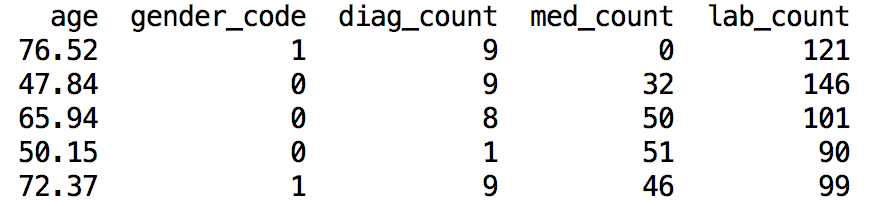

In [3]:
'''Overview of Python code to set up read and process data / set up ETL'''
# import pandas as pd
# import numpy as np
# from nltk.tokenize import word_tokenize
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, roc_auc_score
# from roc import save_roc_plot

'''Read in structured data (with some processing for categorical fields)'''
# path_to_data = 'data/'
# patient_info = pd.read_csv(path_to_data + 'patient_info.csv')
# structured_counts = pd.read_csv(path_to_data + 'structured_counts.csv')
# admission_type = pd.read_csv(path_to_data + 'admissions.csv', usecols=['subject_id', 'admission_type'])
# diag_np = np.genfromtxt(path_to_data + 'admissions.csv', delimiter=',', dtype=str, skip_header=1, usecols=(0, 4))
# diagnoses = pd.DataFrame(diag_np)

'''Assemble processing of diagnosis text field'''
# key_words = ['STROKE', 'PNEUMONIA', 'HEMORRHAGE', 'SEPSIS', 'OVERDOSE',
#                    'FAILURE', 'BRAIN', 'HEART', 'CHEST', 'HEAD']
# get_word_count(diagnoses, key_words)

print('Sample of structured features')
Image(filename='structured_features.png', width=450)

Sample of structured + unstructured features


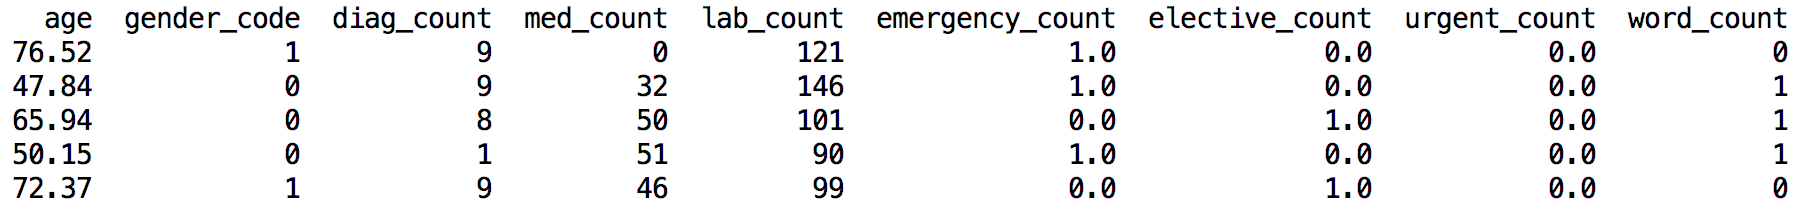

In [4]:
print('Sample of structured + unstructured features')
Image(filename='with_unstructured_features.png', width=850)

Results:


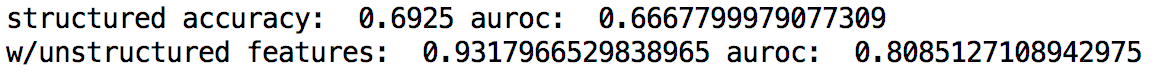

In [5]:
'''Split data for training and testing sets: 80/20 split and run Logistic Regression'''
# sx_train, sx_test, sy_train, sy_test = train_test_split(structured_features, structured_labels, test_size=0.2,
#                                                         random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

'''Review accuracies and aurocs'''
# s_logreg = LogisticRegression(random_state=23).fit(sx_train, sy_train)
# s_preds = s_logreg.predict(sx_test)
# s_accuracy = accuracy_score(sy_test, s_preds)
# s_auroc = roc_auc_score(sy_test, s_preds)
# print('structured accuracy: ', s_accuracy, 'auroc: ', s_auroc)

# all_logreg = LogisticRegression(random_state=23).fit(x_train, y_train)
# all_preds = all_logreg.predict(x_test)
# all_accuracy = accuracy_score(y_test, all_preds)
# all_auroc = roc_auc_score(y_test, all_preds)
# print('including unstructured features: ', all_accuracy, 'auroc: ', all_auroc)

# save_roc_plot(list(sy_test), s_preds, path_to_data + 'structured_roc.png')
# save_roc_plot(list(y_test), all_preds, path_to_data + 'all_features_roc.png')
print('Results:')
Image(filename='resulting_acc_and_auroc.png', width=650)

ROC Curves


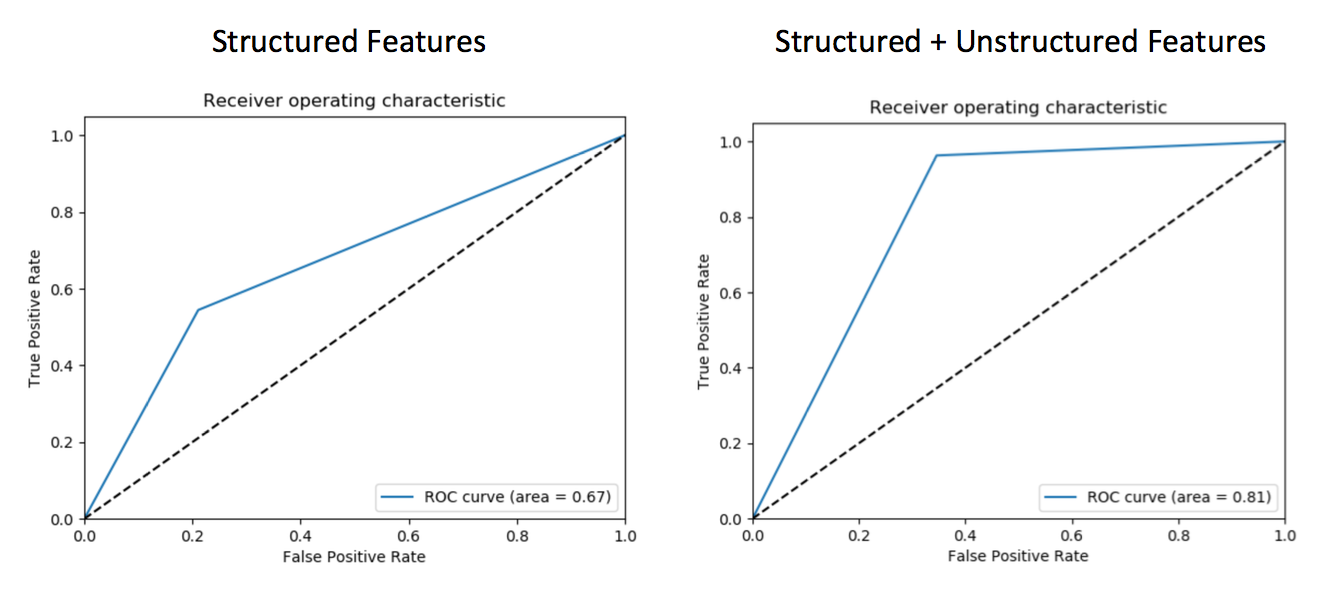

In [6]:
print('ROC Curves')
Image(filename='roc_curves.png', width=650)

### Next Steps:
1. Review diagnoses for a larger set of patients to select "key terms."
1. Consider other ML algorithms for modeling (random forest, neural network). 
1. Dive deeper into the structured data fields and create a more dynamic feature-set. 
1. Consider tf-idf or another method to implement for clinical notes. 